<p>"Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved BSD-3 license. (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to NSF for support via CAREER award #1149784."
<a href="https://twitter.com/LorenaABarba">@LorenaABarba</a></p>


<h1>12 steps to Navier–Stokes</h1><hr>

For a moment, recall the Navier–Stokes equations for an incompressible fluid, where $\vec{\textbf{v}}$ represents the velocity field:

\begin{eqnarray*}
\nabla \cdot\vec{\textbf{v}} = 0 \\
\frac{\partial \vec{\textbf{v}}}{\partial t}+(\vec{\textbf{v}}\cdot\nabla)\vec{\textbf{v}} = -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{\textbf{v}}
\end{eqnarray*}

<p>The first equation represents mass conservation at constant density. The second equation is the conservation of momentum. But a problem appears: the continuity equation for incompressble flow does not have a dominant variable and there is no obvious way to couple the velocity and the pressure. In the case of compressible flow, in contrast, mass continuity would provide an evolution equation for the density $\rho$, which is coupled with an equation of state relating $\rho$ and $p$.</p>
<p>In incompressible flow, the continuity equation $\nabla \cdot\vec{\textbf{v}}=0$ provides a kinematic constraint that requires the pressure field to evolve so that the rate of expansion $\nabla \cdot\vec{\textbf{v}}$ should vanish everywhere. A way out of this difficulty is to construct a pressure field that guarantees continuity is satisfied; such a relation can be obtained by taking the divergence of the momentum equation. In that process, a Poisson equation for the pressure shows up!</p>


<h2>Step 10: 2D Poisson Equation</h2>
<p><a href="https://en.wikipedia.org/wiki/Poisson's_equation">Poisson's equation</a> is obtained from adding a source term to the right-hand-side of Laplace's equation:</p>

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$
So, unlike the <a href="https://en.wikipedia.org/wiki/Poisson's_equation">Laplace equation</a>, there is some finite value inside the field (i.e. b) that affects the solution. Poisson's equation acts to "relax" the initial sources in the field.

In discretized form, this looks almost the same as Step 9, except for the source term:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

<p>As before, we rearrange this so that we obtain an equation for $p$ at point $i,j$. Thus, we obtain:</p>
$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

<p>We will solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:</p>

$p=0$ at $x=0, \ 2 \, $ and $y=0, \ 1$

<p>and the source term consists of two initial spikes inside the domain, as follows:</p>

$b_{i,j}=100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ everywhere else.

The iterations will advance in pseudo-time to relax the initial spikes. The relaxation under Poisson's equation gets slower and slower as they progress. Why?

Let's look at one possible way to write the code for Poisson's equation. As always, we load our favorite Python libraries. We also want to make some lovely plots in 3D. Let's get our parameters defined and the initialization out of the way. What do you notice of the approach below?

In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [7]:
# Parameters
nx = 50 # How wide is our matrix in x
ny = 50 # How wide is our matrix in y
nt = 100 # How many time units

# Boundary Conditions.
xmin = 0
xmax = 2
ymin = 0
ymax = 1

# The size of our incremental steps.
dx = (xmax-xmin) / (nx-1)
dy = (ymax-ymin) / (ny-1)

# Initialize our Arrays
p  = numpy.zeros((ny, nx))   #set our initial pressure to 0 everywhere
pd  = numpy.zeros((ny, nx))
b  = numpy.zeros((ny, nx))

# 
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(ymin, ymax, ny)

# Now build a source (the +b term) and a sink (the -b term).
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)]  = -100

Copy over the applicable code from step 9 and modify it for our current use.  <b>Note:</b> The primary difference being $\textbf{pn}$ has changed to $\textbf{pd}$ and the $\textbf{b[]}$ term has been added.  Also the boundaries have changed.

In [8]:
for it in range(nt):
        pd = p.copy()
        p[1:-1, 1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 + 
                         (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -
                         b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2 * (dx**2 + dy**2)))
        p[0, :] = 0           
        p[ny-1, :] = 0        
        p[:, 0] = 0           
        p[:, nx-1] = 0        


Reuse the plotting function code from Step 9.

In [9]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    
    surf = ax.plot_surface(X, Y, p[:], cmap=cm.viridis, rstride=1, cstride=1,
                          linewidth=0, antialiased=False)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

Now plot our initial conditions to insure that we got what we thought we should get.  Two peaks one positive and one negative. (This looks like a Source and Sink used in Aerodynamics to compute flow lines.)

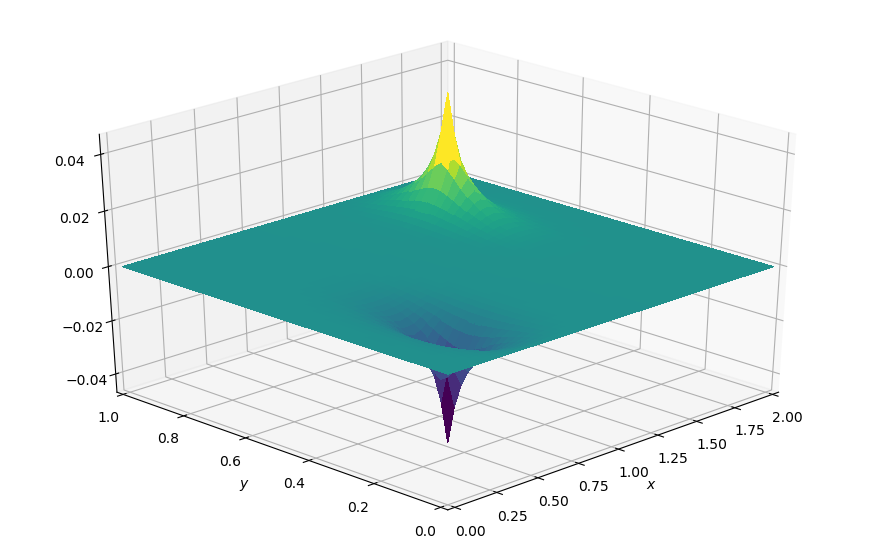

In [6]:
plot2D(x,y,p)

As expected the plot shows what we thought we would get, Two peaks, one positive, one negative.
<br>

<h2>Learn More</h2>
<p> To learn more about the role of Pisson's equation in CFD, watch <b>Video Lesson</b> 11 on YouTube.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZjfxA3qq2Lg')

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()